# **M2-INASYS / OPTIMSYS Course 1: Assignment**


## **Topic : Obesity modelling**

Overweight and obesity are considered by the WHO as serious health concerns. They pose health risks to all individuals living with these conditions. The WHO defines obesity as an abnormal or excessive accumulation of body fat that significantly impacts both a patient’s daily life and overall health.

Faced with this serious health issue, imagine you have been tasked with modeling the problem. The goal is to build a predictive model using historical data about people suffering from obesity, in order to guide public health measures. Based on specific characteristics, the model would help determine an individual’s level or risk of obesity.

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzA1xo7EZ1ZHwDutoxg7416XBcErk_P7f0Pg&s)


As **SARA la Data**, go to https://github.com/EDJINEDJA/Health-Data-modelling.git to download historical information about people suffering from obesity in order to begin the modeling process. The data, located in the **lab1** folder and in CSV format (Comma-Separated Values), is now your property. Enjoy!



*!!!!!!* **The expected files are: the report and the code.**

# **Section 1**

### **Part 1**

#### Q1: Use both your clinical knowledge and data analysis background to describe and present the data provided to you.

Answer : 

In [1]:
#importation des biblio
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

###### obesity_binary

In [3]:
df_binary=pd.read_csv('Health-Data-modelling/lab1/obesity_binary.csv')
print(df_binary.shape)
df_binary

(8, 7)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,0,0,1,0,0,1,0
1,1,1,0,1,1,0,1
2,0,1,1,1,1,0,1
3,1,0,1,1,1,0,1
4,1,1,0,0,0,1,0
5,0,0,0,1,1,1,1
6,0,1,1,0,0,1,0
7,1,0,0,1,1,0,1


###### obesity_data

**variable target** : ObesityCategory ['Normal weight', 'Obese', 'Overweight', 'Underweight']

**lignes et colonnes** : 1000, 7

**variables** : Age , Gender, Height, Weight, BMI, PhysicalActivityLevel

**types de variables** : qualitatives : 29%, quantitatives : 61%

**Analyse des valeurs manquantes** : aucune valeure null

In [6]:
df=pd.read_csv('Health-Data-modelling/lab1/obesity_data.csv')
print(df.shape)
df.head()

(1000, 7)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [7]:
#pour afficher les valeur de la variable  ObesityCategory
df['ObesityCategory'].unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


<Axes: ylabel='proportion'>

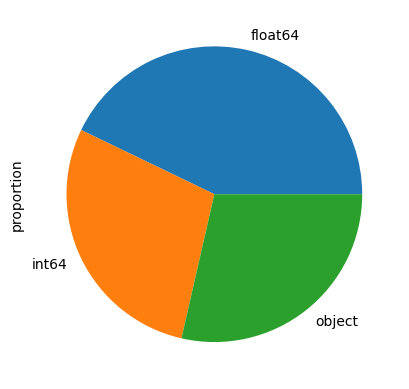

In [46]:
df.dtypes.value_counts('%').plot.pie()

In [10]:
df.isna().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

<Axes: >

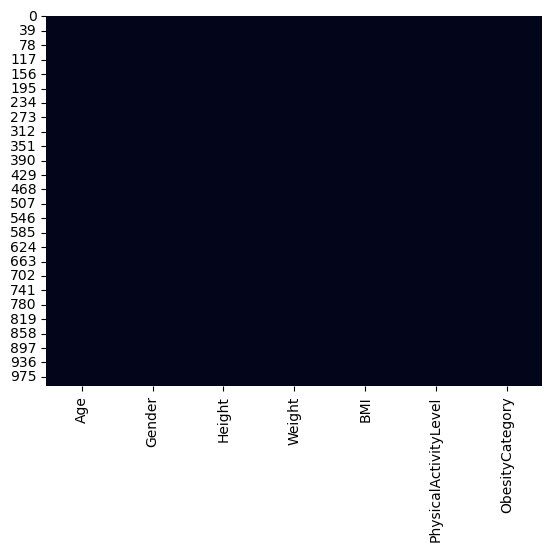

In [11]:
# juste pour afficher le dataset en entier , toute est noir donc  pas de valeurs manqantes 
sns.heatmap(df.isna(),cbar=False)

In [12]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [60]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

                            Age    Height    Weight       BMI  \
Age                    1.000000  0.019647 -0.061400 -0.059971   
Height                 0.019647  1.000000  0.016033 -0.477091   
Weight                -0.061400  0.016033  1.000000  0.861438   
BMI                   -0.059971 -0.477091  0.861438  1.000000   
PhysicalActivityLevel -0.022308  0.030380  0.063406  0.038020   

                       PhysicalActivityLevel  
Age                                -0.022308  
Height                              0.030380  
Weight                              0.063406  
BMI                                 0.038020  
PhysicalActivityLevel               1.000000  


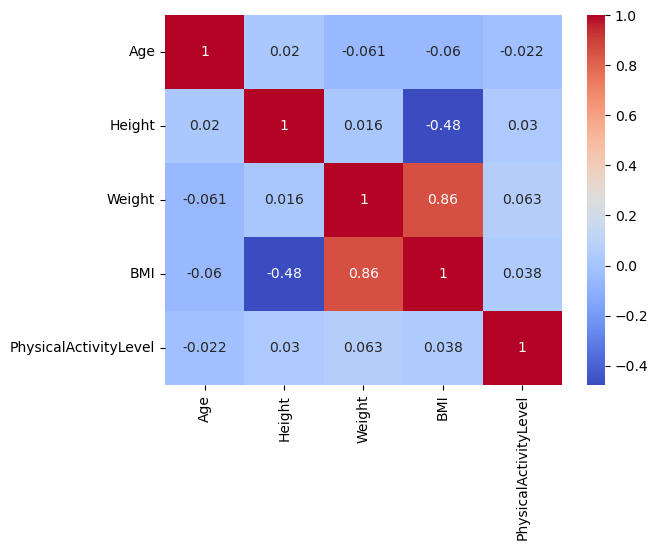

In [63]:
corr = df.corr(numeric_only=True)

# Afficher la matrice
print(corr)

# Visualiser avec un heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

### **Part 2**

#### Q2 : What kind of learning do you need to extract knowledge?

Answer : supirvised learning 

Q3 : Which task of the selected type of learning do you need to perform to extract knowledge?

Answer : classification

Q4 : Define and comment on the evaluation metrics you need to select the best model. Justify your answer rigorously with examples.

Answer : 

Q5 : According to the defined problem, what is the variable of interest?

Answer : ....

Q6 : Still in this context, what is the explanatory variable?

Answer : ....

## **Part3**

Q7 : Since computers cannot interpret categorical variables directly, it is necessary to preprocess the data to make it machine-readable. Do not hesitate to perform further data processing (e.g., handling missing values, removing irrelevant variables, etc.).

Answer : ....

## **Part 4**

One problem we encountered during the learning process is the issue of generalizability. It is a phenomenon where the model overlearns, including the noise in the data, which limits its ability to perform well on unseen data.

That is why, in order to perform good modelling, it is essential to keep a portion of the data aside to evaluate the model after training. This helps give an idea of how well the training actually worked.

![image.png](https://miro.medium.com/1*0mYlQihIDkCziGeYO-ePCQ.png)

Typical splits are 60% for training and 40% for testing or 80/20.

Q8: Split the overall dataset into a training set and a test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = 


In [28]:
y=df['ObesityCategory']
x=df.drop('ObesityCategory',axis=1)

In [34]:
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [30]:
y

0      Normal weight
1              Obese
2         Overweight
3         Overweight
4      Normal weight
           ...      
995       Overweight
996            Obese
997            Obese
998    Normal weight
999    Normal weight
Name: ObesityCategory, Length: 1000, dtype: object

In [32]:
x

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel
0,56,Male,173.575262,71.982051,23.891783,4
1,69,Male,164.127306,89.959256,33.395209,2
2,46,Female,168.072202,72.930629,25.817737,4
3,32,Male,168.459633,84.886912,29.912247,3
4,60,Male,183.568568,69.038945,20.487903,3
...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4
996,35,Female,165.076490,97.639771,35.830783,1
997,49,Female,156.570956,78.804284,32.146036,1
998,64,Male,164.192222,57.978115,21.505965,4


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

## **Part 5**

#### Q9 : Build a decision tree model using Scikit-learn. Keep the default hyperparameters of the chosen algorithm. Specify which decision tree algorithm was used.
See the documentation here: https://scikit-learn.org/.

In [ ]:
model1 =

#### Q10 : Use the test set to evaluate how well your model generalizes to unseen data. Provide a clear explanation of all the evaluation metrics used.

Answer : ....

## **Part 6**

Q11 : Using the same algorithm, propose an alternative criterion for selecting the root node.

In [ ]:
model2 =

Q12 : Use the test set to evaluate how well your new model generalizes to unseen data.

Answer : ....

### **Part 7**

Q13 : Display the decision tree for both Model 1 and Model 2.

##### For model1

In [ ]:
import sys
!{sys.executable} -m pip install graphviz
from graphviz import Source

from IPython.display import display, SVG
from sklearn.tree import export_graphviz

In [ ]:
graph = Source(export_graphviz(...., out_file=None, feature_names=X.columns,
                               class_names=[....], filled = True, rounded=True))

In [ ]:
# The following requires graphviz on your computer
display(SVG(graph.pipe(format='svg')))

In [ ]:
if colab:
    import cv2
    from google.colab.patches import cv2_imshow
    !wget https://raw.githubusercontent.com/alu042/DAT158-2022/master/notebooks/assets/decision_tree_diabetes.png
    img = cv2.imread("decision_tree_diabetes.png", cv2.IMREAD_UNCHANGED)
    cv2_imshow(img)

In [ ]:
if not colab:
    from IPython.display import Image, display
    display(Image("https://raw.githubusercontent.com/alu042/DAT158-2022/master/notebooks/assets/decision_tree_diabetes.png", width='90%'))

##### For model2

Answer : ....

Q14 : Explain which one is more interpretable. Give your reasons.

# **Section 2**

Now you will test one of the algorithms used to construct a decision tree! In this section, we will see how to perform this from scratch.

Therefore, due to the complexity involved in the construction, we will use another binary dataset available in the same folder under the name obesity_binary.

#### *Construct a decision tree using the ID3 algorithm based on information gain.*

**Information Gain**

Information Gain measures the reduction in entropy about the target variable after splitting a dataset based on a particular feature.

![image.png](https://spicerrobotboy.files.wordpress.com/2012/01/decision-tree-equations.png)


Q15 : Load data

Answer ...

Q16 : Which attribute should be chosen for the root node?

Answer ...

Q17 : Write a function to build the tree and visualize the tree.

Answer ...

Q18 : What is the maximum depth of the tree?

Answer ...

Q19 : How many leaf nodes do you have?

Answer ...

# **section 3**

Q20: Repeat the exercise (section 2) for the C4.5 algorithm.